In [1]:
import pandas as pd
import matplotlib as plt

In [2]:
df = pd.read_csv('../data/EuropeanSanctions.csv')

<AxesSubplot: >

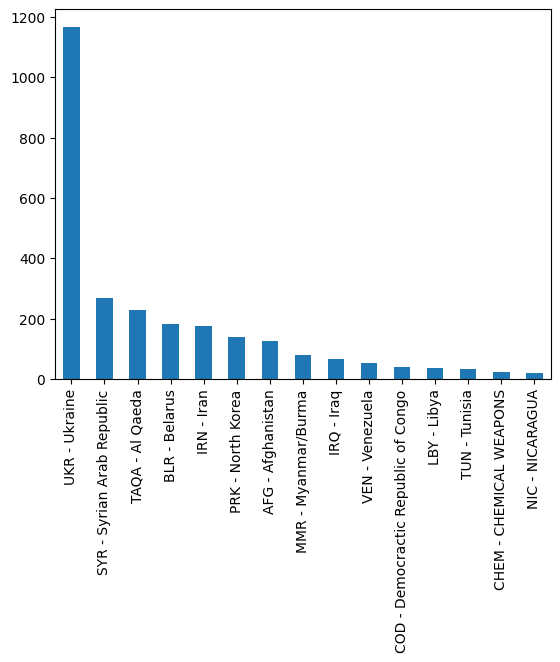

In [3]:
df.Programme.value_counts()[:15].plot.bar()

In [5]:
conll_train_df = pd.read_csv('../data/conll2003/conll2003train.csv')
conll_train_df.head()

,id,tokens,pos_tags,chunk_tags,ner_tags
0,0,['EU' 'rejects' 'German' 'call' 'to' 'boycott'...,[22 42 16 21 35 37 16 21 7],[11 21 11 12 21 22 11 12 0],[3 0 7 0 0 0 7 0 0]
1,1,['Peter' 'Blackburn'],[22 22],[11 12],[1 2]
2,2,['BRUSSELS' '1996-08-22'],[22 11],[11 12],[5 0]
3,3,['The' 'European' 'Commission' 'said' 'on' 'Th...,[12 22 22 38 15 22 28 38 15 16 21 35 24 35 37 ...,[11 12 12 21 13 11 11 21 13 11 12 13 11 21 22 ...,[0 3 4 0 0 0 0 0 0 7 0 0 0 0 0 7 0 0 0 0 0 0 0...
4,4,"['Germany' ""'s"" 'representative' 'to' 'the' 'E...",[22 27 21 35 12 22 22 27 16 21 22 22 38 15 22 ...,[11 11 12 13 11 12 12 11 12 12 12 12 21 13 11 ...,[5 0 0 0 0 3 4 0 0 0 1 2 0 0 0 0 0 0 0 0 0 0 0...


In [7]:
conll_train_df['clean_tokens'] = conll_train_df.tokens.str.replace('[', '').str.replace(']', '').str.replace("'","").str.split()
conll_train_df['clean_ner_tags'] = conll_train_df.ner_tags.str.replace('[', '').str.replace(']', '').str.replace("'","").str.split()

C:\Users\Joshua\AppData\Local\Temp\ipykernel_16964\4001990754.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  conll_train_df['clean_tokens'] = conll_train_df.tokens.str.replace('[', '').str.replace(']', '').str.replace("'","").str.split()
C:\Users\Joshua\AppData\Local\Temp\ipykernel_16964\4001990754.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  conll_train_df['clean_ner_tags'] = conll_train_df.ner_tags.str.replace('[', '').str.replace(']', '').str.replace("'","").str.split()


In [14]:
conll_train_df.head()

,id,tokens,pos_tags,chunk_tags,ner_tags,clean_tokens,clean_ner_tags
0,0,['EU' 'rejects' 'German' 'call' 'to' 'boycott'...,[22 42 16 21 35 37 16 21 7],[11 21 11 12 21 22 11 12 0],[3 0 7 0 0 0 7 0 0],"[EU, rejects, German, call, to, boycott, Briti...","[3, 0, 7, 0, 0, 0, 7, 0, 0]"
1,1,['Peter' 'Blackburn'],[22 22],[11 12],[1 2],"[Peter, Blackburn]","[1, 2]"
2,2,['BRUSSELS' '1996-08-22'],[22 11],[11 12],[5 0],"[BRUSSELS, 1996-08-22]","[5, 0]"
3,3,['The' 'European' 'Commission' 'said' 'on' 'Th...,[12 22 22 38 15 22 28 38 15 16 21 35 24 35 37 ...,[11 12 12 21 13 11 11 21 13 11 12 13 11 21 22 ...,[0 3 4 0 0 0 0 0 0 7 0 0 0 0 0 7 0 0 0 0 0 0 0...,"[The, European, Commission, said, on, Thursday...","[0, 3, 4, 0, 0, 0, 0, 0, 0, 7, 0, 0, 0, 0, 0, ..."
4,4,"['Germany' ""'s"" 'representative' 'to' 'the' 'E...",[22 27 21 35 12 22 22 27 16 21 22 22 38 15 22 ...,[11 11 12 13 11 12 12 11 12 12 12 12 21 13 11 ...,[5 0 0 0 0 3 4 0 0 0 1 2 0 0 0 0 0 0 0 0 0 0 0...,"[Germany, ""s"", representative, to, the, Europe...","[5, 0, 0, 0, 0, 3, 4, 0, 0, 0, 1, 2, 0, 0, 0, ..."


In [12]:
list(zip(conll_train_df.clean_tokens[4], conll_train_df.clean_ner_tags[4]))[0][1]

'5'

In [20]:
def extract_names_from_df(df, tokencolumn, ner_column):
    names = []
    for row in range(len(df[tokencolumn])):
        for tupel in list(zip(df[tokencolumn][row], df[ner_column][row])):
            if tupel[1] == '1' or tupel[1] == '2':
                names.append(tupel[0])
    return names
    

In [22]:
names = extract_names_from_df(conll_train_df, 'clean_tokens', 'clean_ner_tags')

In [23]:
len(names)

11128

In [24]:
# install librabry
%pip install ethnicolr

  Using cached ethnicolr-0.9.3-py2.py3-none-any.whl (39.5 MB)
  Using cached tensorflow-2.11.0-cp39-cp39-win_amd64.whl (1.9 kB)
  Using cached tensorflow_intel-2.11.0-cp39-cp39-win_amd64.whl (266.3 MB)
Note: you may need to restart the kernel to use updated packages.


In [36]:
from ethnicolr import census_ln, pred_census_ln, pred_wiki_ln, pred_wiki_name, pred_fl_reg_ln

In [26]:
names_df = pd.DataFrame(names, columns=['name'])

In [28]:
census_ln(names_df, 'name')

,name,pctwhite,pctblack,pctapi,pctaian,pct2prace,pcthispanic
0,Peter,77.87,7.03,6.78,3.71,2.07,2.55
1,Blackburn,88.90,7.01,0.37,0.83,1.47,1.41
2,Werner,96.40,0.37,0.59,0.27,0.97,1.39
3,Zwingmann,NaN,NaN,NaN,NaN,NaN,NaN
4,Nikolaus,97.93,(S),(S),(S),(S),(S)
...,...,...,...,...,...,...,...
11123,Hedblom,91.97,(S),0.00,0.00,(S),4.38
11124,Retief,NaN,NaN,NaN,NaN,NaN,NaN
11125,Goosen,97.38,(S),(S),(S),1.31,(S)
11126,David,65.29,13.75,10.50,1.84,2.60,6.03


In [40]:
names_predictions_df = pred_wiki_ln(names_df, 'name')

In [41]:
names_predictions_df.columns

Index(['name', 'Asian,GreaterEastAsian,EastAsian',
       'Asian,GreaterEastAsian,Japanese', 'Asian,IndianSubContinent',
       'GreaterAfrican,Africans', 'GreaterAfrican,Muslim',
       'GreaterEuropean,British', 'GreaterEuropean,EastEuropean',
       'GreaterEuropean,Jewish', 'GreaterEuropean,WestEuropean,French',
       'GreaterEuropean,WestEuropean,Germanic',
       'GreaterEuropean,WestEuropean,Hispanic',
       'GreaterEuropean,WestEuropean,Italian',
       'GreaterEuropean,WestEuropean,Nordic', 'race'],
      dtype='object')

In [43]:
# get name of column with max value

names_predictions_df['max_value'] = names_predictions_df[
    ['Asian,GreaterEastAsian,EastAsian',
       'Asian,GreaterEastAsian,Japanese', 'Asian,IndianSubContinent',
       'GreaterAfrican,Africans', 'GreaterAfrican,Muslim',
       'GreaterEuropean,British', 'GreaterEuropean,EastEuropean',
       'GreaterEuropean,Jewish', 'GreaterEuropean,WestEuropean,French',
       'GreaterEuropean,WestEuropean,Germanic',
       'GreaterEuropean,WestEuropean,Hispanic',
       'GreaterEuropean,WestEuropean,Italian',
       'GreaterEuropean,WestEuropean,Nordic']
    ].idxmax(axis=1)

<AxesSubplot: >

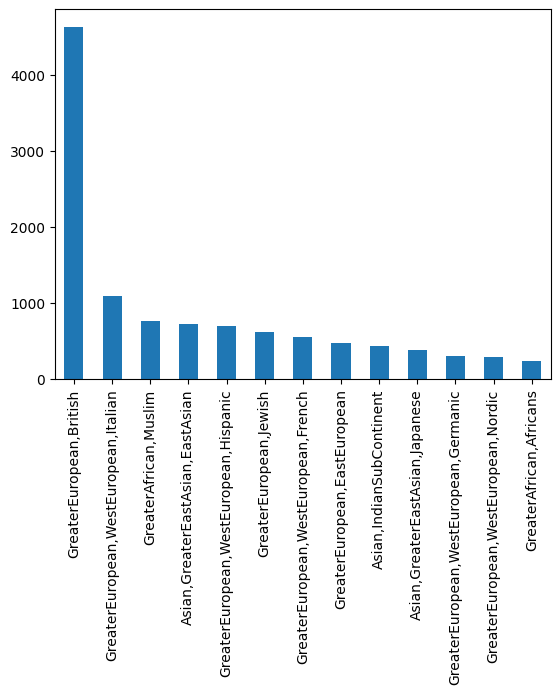

In [46]:
names_predictions_df.race.value_counts().plot.bar()

In [38]:
pred_fl_reg_ln(names_df, 'name')

,name,asian,hispanic,nh_black,nh_white,race
0,Peter,0.011000,0.026643,0.171615,0.790742,nh_white
1,Blackburn,0.007856,0.025816,0.038489,0.927840,nh_white
2,Werner,0.007907,0.020864,0.007079,0.964150,nh_white
3,Zwingmann,0.008947,0.029027,0.010981,0.951045,nh_white
4,Nikolaus,0.013478,0.018879,0.013838,0.953805,nh_white
...,...,...,...,...,...,...
11123,Hedblom,0.012487,0.014451,0.020479,0.952582,nh_white
11124,Retief,0.006478,0.192197,0.057397,0.743929,nh_white
11125,Goosen,0.027368,0.036216,0.066716,0.869700,nh_white
11126,David,0.032793,0.105270,0.333693,0.528243,nh_white
